In [1]:
# Krok 1: Import wymaganych bibliotek
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Krok 2: Definicja funkcji celu i jej gradientu
def f(x, y):
    return x**4 + y**4 - 2 * x**2 * y

def grad_f(x, y):
    df_dx = 4 * x**3 - 4 * x * y
    df_dy = 4 * y**3 - 2 * x**2
    return np.array([df_dx, df_dy])


In [3]:
# Krok 3: Implementacja algorytmu gradientowego
def gradient_descent(eta, steps, start):
    path = [start]
    point = np.array(start, dtype=float)

    for _ in range(steps):
        grad = grad_f(point[0], point[1])
        point = point - eta * grad
        path.append(point.copy())
    return np.array(path)


In [4]:
# Krok 4: Wykonanie eksperymentu dla różnych eta
etas = [0.01, 0.001, 0.0001]
paths = {}

for eta in etas:
    path = gradient_descent(eta=eta, steps=100, start=[1.0, 1.0])
    paths[eta] = path


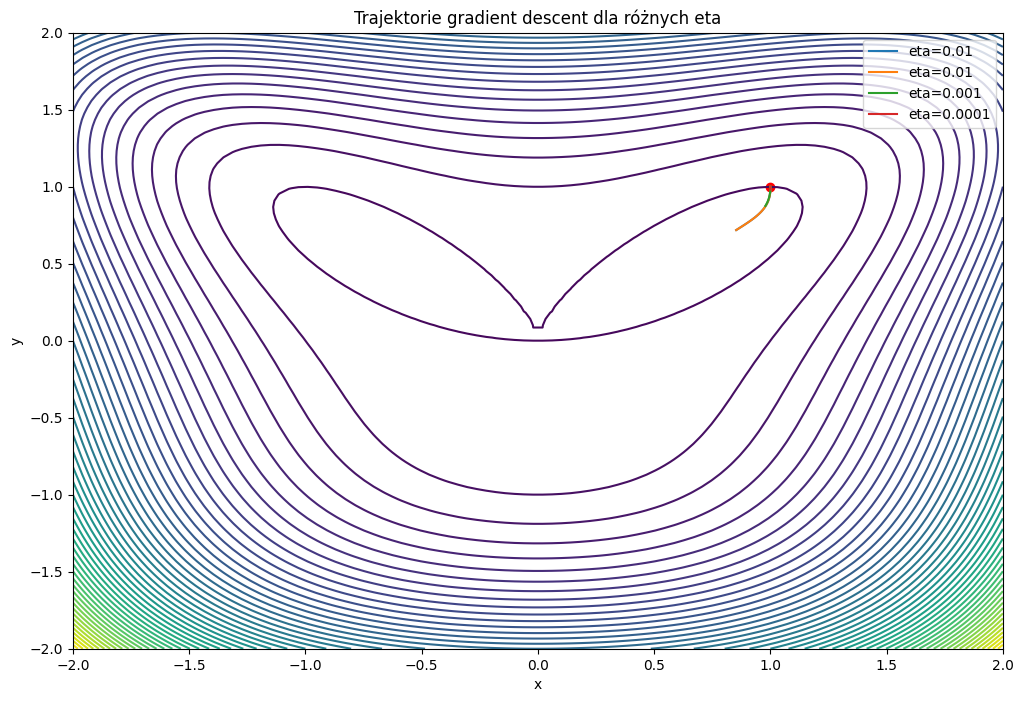

In [5]:
# Krok 5: Wizualizacja trajektorii optymalizacji
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(12, 8))
for eta, path in paths.items():
    plt.contour(X, Y, Z, levels=50)
    plt.plot(path[:, 0], path[:, 1], label=f"eta={eta}")
    plt.scatter(path[0, 0], path[0, 1], color='red')  # start
    plt.title("Trajektorie gradient descent dla różnych eta")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    break  # tylko jedna siatka konturów
for eta, path in paths.items():
    plt.plot(path[:, 0], path[:, 1], label=f"eta={eta}")
plt.legend()
plt.show()


In [6]:
# Krok 6: Import bibliotek do MNIST i TensorBoard
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter


In [7]:
# Krok 7: Przygotowanie danych MNIST
transform = transforms.ToTensor()
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=64,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=False, transform=transform),
    batch_size=1000,
    shuffle=False
)


100%|██████████| 9.91M/9.91M [00:05<00:00, 1.76MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 250kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]


In [8]:
# Krok 8: Definicja sieci MLP
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [9]:
# Krok 9: Trenowanie MLP z monitorowaniem TensorBoard
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
writer = SummaryWriter()

for epoch in range(5):
    model.train()
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    writer.add_scalar("Loss/train", avg_loss, epoch)
    print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

writer.close()


Epoch 0, Loss: 0.3408
Epoch 1, Loss: 0.1523
Epoch 2, Loss: 0.1085
Epoch 3, Loss: 0.0828
Epoch 4, Loss: 0.0657
